In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# Generate some numbers
data = np.random.randn(400,2)
data[:100] += 5, 5
data[100:200] += 10, 10
data[200:300] += 10, 5
data[300:] += 5, 10

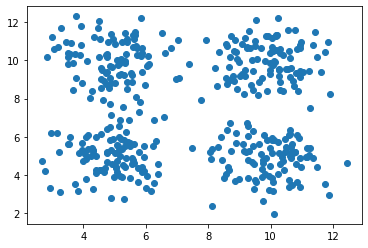

In [77]:
fig, ax = plt.subplots()

ax.scatter(x=data[:,0], y=data[:,1])

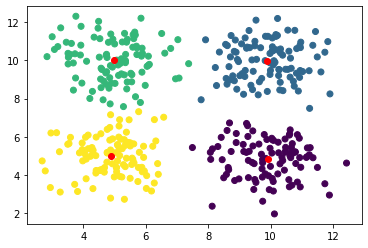

In [78]:
model = KMeans(n_clusters=4, init='random', random_state=42, max_iter=10, n_init=1)

model.fit(data)

y_pred = model.predict(data)

fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], c='r')

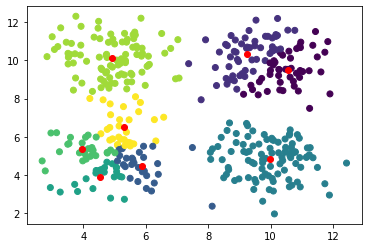

In [79]:
# increase number of clusters 
model = KMeans(n_clusters=8, init='random', random_state=42, max_iter=100, n_init=1)

model.fit(data)

y_pred = model.predict(data)

fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], c='r')

In [69]:
#Different k values
#Find the best number of clusters
sse = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(data)
    sse.append(model.inertia_)

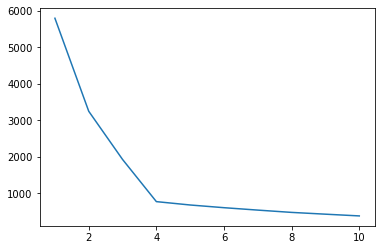

In [70]:
#Create plot
fig, ax = plt.subplots()
ax.plot(range(1, 11), sse)

In [71]:
#The silhouette coefficient
from sklearn.metrics import silhouette_score

In [74]:
#Calculate Silouette Coefficients
silhouette_coefficients = []

for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(data)
    score = silhouette_score(data, model.labels_)
    silhouette_coefficients.append(score)

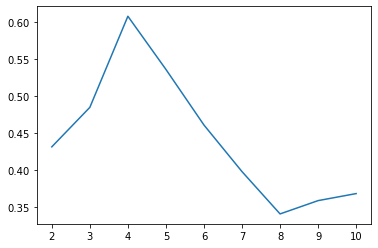

In [75]:
#Plot the result
fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_coefficients)